# 2023年度 実世界情報実験１　画像処理テーマ

# 第5課題ファイル

第5課題ファイルではより高度な画像処理の一つである、画像認識について、
実際にプログラムを動かしながら学ぶ。
中身の詳しいアルゴリズムや処理の原理については
ここでは細かくチェックしないが、OpenCVに標準搭載された実用的な
モジュールがたくさん紹介してあるので、可能な限り課題を動かしてみること。

## 補足

高度な画像処理を行う場合、画像の解像度が高いと実行に非常に
時間やメモリを要する場合がある。
また、提出時のファイルサイズが非常に大きくなることもある。

特に自分で撮影した画像を用いる場合、必要に応じて縮小した画像を
用いて実験を行うとよい。
OpenCVの `cv2.resize()` 関数を用いると簡単に縮小することができる。
[OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 »
画像の幾何変換 » スケーリング(拡大・縮小)](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#id4)
の項を参考にすればよい。

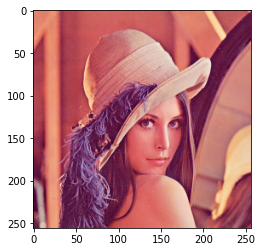

In [ ]:
# 画像の縮小の例
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg')
height, width = img.shape[:2]
reduced_img = cv2.resize(img,(width//2, height//2), interpolation = cv2.INTER_CUBIC)
cv2.imwrite('reduced_lena.png', reduced_img)
plt.imshow(cv2.cvtColor(reduced_img,cv2.COLOR_BGR2RGB))

## 顔検出
- [OpenCV-Pythonチュートリアル » 物体検出 » Haar Cascadesを使った顔検出](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html)

人の顔を画像から検出する技術は対話ロボットから顔認証まで
非常に広い応用分野を持つ。

これまでの直線検出やテンプレートがあらかじめ与えられている物体を
検出する例とは異なり、様々なパターンのある人の顔を検出するには
「人の顔とはどういうものか」を何らかの形で学習しそれに基づいた
検出手法を開発しなければならない。

顔検出は2000年にViola-Jones法という手法の論文が発表されて
劇的に性能が向上し現在に至る。
この手法はHaar特徴をつかったAdaboostカスケード型パターン分類器という
ものを用いている。
詳しくはチュートリアルを読んでもらうとして、コードをコピーして
実際に顔が検出されることを確認せよ。

顔や目などを学習させた結果のデータベースは
[GitHub](https://github.com/) の
[OpenCVのrepository](https://github.com/opencv/opencv/)の
[data/haarcascadesのフォルダ](https://github.com/opencv/opencv/tree/master/data/haarcascades)
からダウンロードできる。

### 課題 5-1
チュートリアルのコードを参考に
人の顔が写っている画像から顔と目を
検出し、結果を図示した画像を表示・保存せよ。
画像内に複数の顔が写っている場合でも
それぞれ検出できるようにすること
(複数検出できることを示す結果が必要である)。
また入力画像は資料として添付している画像とは
異なる、顔が複数写っているものを各自で用意すること。

正面から撮影した顔のデータベースには `haarcascade_frontalface_default.xml` を、目のデータベースには `haarcascade_eye.xml` を用いればよい。
これらのファイルは事前にGoogle Colaboratoryにアップロード
しておく必要があることに注意すること
（入力画像ファイルと同じ）。

プログラムコードだけでなく、元となった画像と生成結果の
画像も画像ファイルとして提出すること。
元画像のファイル名は `lesson5-1-input.png`
（JPEGファイルであれば `lesson5-1-input.jpg` ）とし、
結果のファイル名は `lesson5-1.png` とすること。

True

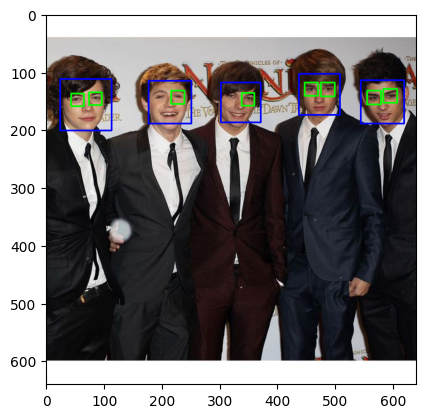

In [ ]:
# 課題 5-1 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# haarcascade_frontalface_default.xml from https://github.com/opencv/opencv/tree/master/data/haarcascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# haarcascade_eye.xml from https://github.com/opencv/opencv/tree/master/data/haarcascades
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
img = cv2.imread('lesson5-1-input.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
cv2.imwrite("lesson5-1.png",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


## 物体検出

### 課題 5-2
課題5-1で使用したパターン分類器はデータベースによって様々な
対象の検出に用いることができる。

[GitHub](https://github.com/) の
[OpenCVのrepository](https://github.com/opencv/opencv/)の
[data/haarcascadesのフォルダ](https://github.com/opencv/opencv/tree/master/data/haarcascades)
から、顔以外にも人の全身や上半身を学習させた結果のデータベースも
ダウンロードできる。
課題5-1で用いたもの **以外** のデータベースを用いて
複数の画像から
（何らかの）対象を検出し、表示・保存せよ。

複数の画像は、個別のファイルを複数用いても良いし
単一の動画ファイルから複数フレームを取り出して利用
しても良い。
但し実行例を確認するために資料に添付している
画像ファイルや動画ファイルとは異なるものを各自で
用意すること。

動画ファイルを用いる場合に連続するフレームを使用
するとほぼ同じ内容の画像に対して繰り返し検出を
試みることになってしまう。
異なる状況での検出を行うため使用するフレームの
間隔を十分空けておく必要がある。

また、検出器には誤検出や未検出の問題が起こり得るが、
主に対象としているものが複数検出できるような
入力画像や動画を選ぶこと。
（例えば人を検出する検出器を用いているのに
写っている人が全員見逃されてしまうような入力を
選んではいけない）

プログラムコードだけでなく、元となった画像（動画）と
生成結果の画像も画像ファイルとして提出すること。
元画像のファイル名は `lesson5-2-input-1.png`,
`lesson5-2-input-2.png`, ...
（JPEGファイルであれば `lesson5-2-input-1.jpg` など）とし、
結果のファイル名は `lesson5-2-1.png`,  `lesson5-2-2.png`, ... とすること。
複数の場合は末尾の番号を変えたファイル名とする。

> ヒント
>
> https://github.com/opencv/opencv/tree/master/data/haarcascades
に集められているデータベースファイルはそれぞれ
先頭部分にコメントとして対象物に関する情報が記載
されているので適宜参照すると良い。
特に対象物の画面上のサイズが認識したい画像と揃って
いないと見落とす可能性が高くなる。
>
>例えば縦20pixel、横10pixelのサイズで写っている人体画像を
学習したデータベースを使う場合、縦100pixel、横50pixelの
サイズで写っている人体を検出できる見込みは低くなる。
使うデータベースに合わせて画像を拡大縮小してもよい。
>
>動画ファイルを扱う方法については
チュートリアルが参考になる。
>
>参考: [OpenCV-Pythonチュートリアル » OpenCVのGUI機能 » 動画を扱う](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_gui/py_video_display/py_video_display.html)

True

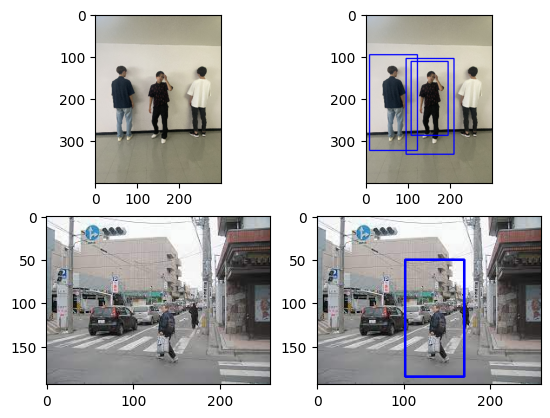

In [ ]:
# 課題 5-2 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

# haarcascade_fullbody.xml from https://github.com/opencv/opencv/tree/master/data/haarcascades
fullbody_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')

img1 = cv2.imread('lesson5-2-input-1.jpg')
img2 = cv2.imread('lesson5-2-input-2.jpg')
img1 = cv2.resize(img1, (300, 400))

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
org1=img1.copy()
org2=img2.copy()
fullbody1 = fullbody_cascade.detectMultiScale(gray1, 1.3, 1)
fullbody2 = fullbody_cascade.detectMultiScale(gray2, 1.3, 1)
for (x,y,w,h) in fullbody1:
    img1 = cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
for (x,y,w,h) in fullbody2:
    img2 = cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(org1,cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(org2,cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
cv2.imwrite("lesson5-2-1.png",img1)
cv2.imwrite("lesson5-2-2.png",img2)